In [1]:
import pandas as pd

df = pd.read_csv("test_preds.tsv",sep="\t")

In [2]:
zeroshot = pd.read_csv("test_preds_zero_shot.tsv",sep="\t")

In [3]:
df.columns

Index(['Prediction', 'Label', 'Sentences'], dtype='object')

In [4]:
df = df.rename(columns={"Prediction":"preds_sup","Label":"actuals","Sentences":"tokenized_sents"})

In [5]:
df["preds_zero"] = zeroshot["Prediction"]

In [6]:
translations = pd.read_excel("test_preds_with_translations.xlsx")

In [7]:
df["translations"] = translations["translations"]

In [8]:
df.columns

Index(['preds_sup', 'actuals', 'tokenized_sents', 'preds_zero',
       'translations'],
      dtype='object')

In [9]:
(df.preds_sup==df.actuals).sum()/2000

0.92

In [10]:
(df.preds_zero==df.actuals).sum()/2000

0.8895

In [11]:
pd.set_option('display.max_colwidth', -1)

In [12]:
with open("test.txt",encoding="utf-8") as f:
    original_sents = f.read().strip().split("\n")
original_sents = [sent.split("\t")[1] for sent in original_sents]

In [13]:
df["raw_sents"] = original_sents

In [14]:
df.head()

,preds_sup,actuals,tokenized_sents,preds_zero,translations,raw_sents
0,1,1,"<s> ▁Dit ▁is ▁een ▁boek ▁dat ▁je ▁gelijk ▁uit ▁wil ▁lezen ▁als ▁je ▁er ▁in ▁begint . ▁Een ▁drama ▁als ▁er ▁iemand ▁is ▁overleden ▁en ▁hoe ▁je ▁daarmee ▁om ▁gaat . ▁Uit ▁verschillende ▁kanten ▁beschreven ▁ . ▁De ▁moeder ▁be schuld igt ▁de ▁verlo of de ▁en ▁de ▁verlo of de ▁denkt ▁dat ▁het ▁haar ▁schuld ▁is ... heel ▁bijzonder ▁hoe ▁het ▁toch ▁nog ▁op ▁het ▁einde ▁allemaal ▁"" goed ▁komt "". </s>",1,"This is a book you read right if you want to start. A tragedy when someone is deceased and therefore how about. described from different angles. The mother blames the fiance and the fiancee thinks it's her fault ... how very special it still in the end all ""will be fine"".","Dit is een boek dat je gelijk uit wil lezen als je er in begint. Een drama als er iemand is overleden en hoe je daarmee om gaat. Uit verschillende kanten beschreven . De moeder beschuldigt de verloofde en de verloofde denkt dat het haar schuld is...heel bijzonder hoe het toch nog op het einde allemaal ""goed komt""."
1,1,1,"<s> ▁Dit ▁is ▁het ▁verhaal ▁over ▁Sam my , ▁elke ▁dag ▁als ▁ze ▁wa kker ▁wordt ▁zit ▁ze ▁onder ▁de ▁bul ten ▁en ▁sch ram men . ▁Deze ▁loopt ▁ze ▁blij k baar ▁op ▁in ▁haar ▁nacht mer ries . ▁Maar ▁hoe ▁dan ? ▁Sam my ▁denk ▁dat ▁ze ▁ krank zin nig ▁wordt , ▁ze ▁wordt ▁ook ▁totaal ▁uitge put ▁wa kker ... ▁Ze ▁moet ▁er ▁iets ▁aan ▁doen ▁maar ▁wat ? ▁Ze ▁besluit ▁om ▁met ▁haar ▁beste ▁vriend ▁Matt ▁uit ▁te ▁gaan ▁zoeken ▁wat ▁haar ▁dro men ▁beteken en . ▁In ▁hun ▁zoek tocht ▁komen ▁ze ▁uit ▁bij ▁Dar on ▁ , ▁die ▁een ▁belangrijke ▁rol ▁speelt ▁in ▁haar ▁ droom . ▁Wie ▁is ▁hij ▁en ▁waarom ▁maakt ▁hij ▁haar ▁het ▁leven ▁zu ur ▁in ▁haar ▁nacht mer ries ? ▁Er ▁zit ▁niks ▁anders ▁op ▁dan ▁met ▁hem ▁samen ▁te ▁werken ▁om ▁er ▁achter ▁te ▁komen . ▁Wat ▁ze ▁dan ▁allemaal ▁mee maak t , ▁is ▁met ▁geen ▁pen ▁te ▁be schrijven . ... ▁Ze ▁komt ▁in ▁een ▁wereld ▁waar ▁zelfs ▁de ▁do den ▁niet ▁welkom ▁zijn . ... V oor ▁Sam my ▁is ▁het ▁echter ▁wel ▁de ▁s le u tel ▁naar ▁de ▁oplossing ▁van ▁haar ▁probleem . Je ▁le ert ▁Sam my ▁kennen ▁als ▁een ▁jonge ▁vrouw ▁die ▁veel ▁heeft ▁mee gemaakt ▁ . Ze ▁heeft ▁elke ▁dag ▁nacht mer ries ▁en ▁is ▁altijd ▁mo e ▁als ▁uit ▁bed ▁komt , ▁ze ▁heeft ▁maar ▁weinig ▁vrienden . ▁Ze ▁heeft ▁haar ▁reden en ▁om ▁die ▁buiten ▁de ▁deur ▁te ▁houden ▁ , ▁daar ▁kom ▁je ▁in ▁loop ▁van ▁het ▁verhaal ▁wel ▁achter . ▁Je ▁kan ▁je ▁heel ▁goed ▁in ▁haar ▁ver plaats en , ▁de ▁dro men ▁worden ▁zo ▁leven dig ▁en ▁realistisch ▁beschreven ▁dat ▁je ▁je ▁zelf ▁in ▁die ▁ droom ▁wa ant . ▁Hoe ▁gru w elijk ▁of ▁ra ar ▁ook ▁ , ▁het ▁komt ▁allemaal ▁echt ▁over . Matt ▁is ▁een ▁apart ▁jonge n , ▁die ▁Sam my ▁wel ▁wil ▁helpen ▁maar ▁die ▁het ▁som s ▁moeilijk ▁heeft ▁met ▁haar ▁eigen aardig heden . ▁Toch ▁geeft ▁hij ▁niet ▁op ▁en ▁blijft ▁haar ▁steun en . ▁Ik ▁mag ▁hem ▁wel . Dar on ▁is ▁erg ▁bijzonder , ▁je ▁krijgt ▁de ▁kri e bel s ▁van ▁hem ▁maar ▁tegelijkertijd ▁weet ▁je ▁ook ▁dat ▁dit ▁maar ▁een ▁kant ▁van ▁hem ▁is ▁en ▁dat ▁Sam my ▁hem ▁blij k baar ▁nodig ▁heeft . ▁Je ▁le ert ▁hem ▁goed ▁genoeg ▁kennen ▁om ▁je ▁in ▁hem ▁te ▁kunnen ▁in leven . Dan ▁is ▁er ▁nog ▁Cale b , ▁ik ▁had ▁meteen ▁door ▁wie ▁dit ▁is ▁ . ▁Hij ▁is ▁apart ▁maar ▁je ▁kan ▁je ▁goed ▁voor stellen ▁hoe ▁hij ▁zo ▁is ▁geworden . ▁Zijn ▁verhaal lijn ▁is ▁erg ▁interessant . De ▁ auteur ▁heeft ▁de ▁sfeer ▁in ▁Mid land ▁erg ▁mooi , ▁helder ▁en ▁leven dig ▁beschreven , ▁je ▁ziet ▁het ▁meteen ▁voor ▁je . ▁Wat ▁een ▁plaats ..... Het ▁boek ▁is ▁dik ▁(5 28 ▁pagina ’ s ) ▁maar ▁je ▁le est ▁hem ▁zo ▁uit , ▁het ▁verhaal </s>",1,"This is the story of Sammy, every day when she wakes up she is under the bumps and scrapes. This they apparently runs in her nightmares. But how? Sammy think she is insane, she is also totally exhausted awake ... They should do something about it too? She decides to find some meaning in her dreams with her best friend Matt. In their search, they arrive at Daron, which plays an important role in her dream. W

In [15]:
df["tokenized_len"] = df.tokenized_sents.str.count("▁")

In [16]:
df["raw_len"] = df["raw_sents"].str.count(' ')

In [17]:
import numpy as np
buffer = 10
df["is_input_truncated"] = buffer<np.abs(df["raw_len"]-df["tokenized_len"])

In [18]:
df.is_input_truncated.value_counts()

False    1500
True     500 
Name: is_input_truncated, dtype: int64

In [19]:
df["is_correct"] = df.preds_sup==df.actuals

In [20]:
df[df.is_correct].is_input_truncated.value_counts()

False    1417
True     423 
Name: is_input_truncated, dtype: int64

In [21]:
pd.options.display.max_rows = 999

In [22]:
# df[df.raw_sents.str.contains("niet")].sort_values(by="tokenized_len")[["actuals","raw_sents"]]

In [23]:
zero_wrong_sup_right = (df.actuals==df.preds_sup) & ~(df.actuals==df.preds_zero)

In [24]:
df.head()

,preds_sup,actuals,tokenized_sents,preds_zero,translations,raw_sents,tokenized_len,raw_len,is_input_truncated,is_correct
0,1,1,"<s> ▁Dit ▁is ▁een ▁boek ▁dat ▁je ▁gelijk ▁uit ▁wil ▁lezen ▁als ▁je ▁er ▁in ▁begint . ▁Een ▁drama ▁als ▁er ▁iemand ▁is ▁overleden ▁en ▁hoe ▁je ▁daarmee ▁om ▁gaat . ▁Uit ▁verschillende ▁kanten ▁beschreven ▁ . ▁De ▁moeder ▁be schuld igt ▁de ▁verlo of de ▁en ▁de ▁verlo of de ▁denkt ▁dat ▁het ▁haar ▁schuld ▁is ... heel ▁bijzonder ▁hoe ▁het ▁toch ▁nog ▁op ▁het ▁einde ▁allemaal ▁"" goed ▁komt "". </s>",1,"This is a book you read right if you want to start. A tragedy when someone is deceased and therefore how about. described from different angles. The mother blames the fiance and the fiancee thinks it's her fault ... how very special it still in the end all ""will be fine"".","Dit is een boek dat je gelijk uit wil lezen als je er in begint. Een drama als er iemand is overleden en hoe je daarmee om gaat. Uit verschillende kanten beschreven . De moeder beschuldigt de verloofde en de verloofde denkt dat het haar schuld is...heel bijzonder hoe het toch nog op het einde allemaal ""goed komt"".",58,57,False,True
1,1,1,"<s> ▁Dit ▁is ▁het ▁verhaal ▁over ▁Sam my , ▁elke ▁dag ▁als ▁ze ▁wa kker ▁wordt ▁zit ▁ze ▁onder ▁de ▁bul ten ▁en ▁sch ram men . ▁Deze ▁loopt ▁ze ▁blij k baar ▁op ▁in ▁haar ▁nacht mer ries . ▁Maar ▁hoe ▁dan ? ▁Sam my ▁denk ▁dat ▁ze ▁ krank zin nig ▁wordt , ▁ze ▁wordt ▁ook ▁totaal ▁uitge put ▁wa kker ... ▁Ze ▁moet ▁er ▁iets ▁aan ▁doen ▁maar ▁wat ? ▁Ze ▁besluit ▁om ▁met ▁haar ▁beste ▁vriend ▁Matt ▁uit ▁te ▁gaan ▁zoeken ▁wat ▁haar ▁dro men ▁beteken en . ▁In ▁hun ▁zoek tocht ▁komen ▁ze ▁uit ▁bij ▁Dar on ▁ , ▁die ▁een ▁belangrijke ▁rol ▁speelt ▁in ▁haar ▁ droom . ▁Wie ▁is ▁hij ▁en ▁waarom ▁maakt ▁hij ▁haar ▁het ▁leven ▁zu ur ▁in ▁haar ▁nacht mer ries ? ▁Er ▁zit ▁niks ▁anders ▁op ▁dan ▁met ▁hem ▁samen ▁te ▁werken ▁om ▁er ▁achter ▁te ▁komen . ▁Wat ▁ze ▁dan ▁allemaal ▁mee maak t , ▁is ▁met ▁geen ▁pen ▁te ▁be schrijven . ... ▁Ze ▁komt ▁in ▁een ▁wereld ▁waar ▁zelfs ▁de ▁do den ▁niet ▁welkom ▁zijn . ... V oor ▁Sam my ▁is ▁het ▁echter ▁wel ▁de ▁s le u tel ▁naar ▁de ▁oplossing ▁van ▁haar ▁probleem . Je ▁le ert ▁Sam my ▁kennen ▁als ▁een ▁jonge ▁vrouw ▁die ▁veel ▁heeft ▁mee gemaakt ▁ . Ze ▁heeft ▁elke ▁dag ▁nacht mer ries ▁en ▁is ▁altijd ▁mo e ▁als ▁uit ▁bed ▁komt , ▁ze ▁heeft ▁maar ▁weinig ▁vrienden . ▁Ze ▁heeft ▁haar ▁reden en ▁om ▁die ▁buiten ▁de ▁deur ▁te ▁houden ▁ , ▁daar ▁kom ▁je ▁in ▁loop ▁van ▁het ▁verhaal ▁wel ▁achter . ▁Je ▁kan ▁je ▁heel ▁goed ▁in ▁haar ▁ver plaats en , ▁de ▁dro men ▁worden ▁zo ▁leven dig ▁en ▁realistisch ▁beschreven ▁dat ▁je ▁je ▁zelf ▁in ▁die ▁ droom ▁wa ant . ▁Hoe ▁gru w elijk ▁of ▁ra ar ▁ook ▁ , ▁het ▁komt ▁allemaal ▁echt ▁over . Matt ▁is ▁een ▁apart ▁jonge n , ▁die ▁Sam my ▁wel ▁wil ▁helpen ▁maar ▁die ▁het ▁som s ▁moeilijk ▁heeft ▁met ▁haar ▁eigen aardig heden . ▁Toch ▁geeft ▁hij ▁niet ▁op ▁en ▁blijft ▁haar ▁steun en . ▁Ik ▁mag ▁hem ▁wel . Dar on ▁is ▁erg ▁bijzonder , ▁je ▁krijgt ▁de ▁kri e bel s ▁van ▁hem ▁maar ▁tegelijkertijd ▁weet ▁je ▁ook ▁dat ▁dit ▁maar ▁een ▁kant ▁van ▁hem ▁is ▁en ▁dat ▁Sam my ▁hem ▁blij k baar ▁nodig ▁heeft . ▁Je ▁le ert ▁hem ▁goed ▁genoeg ▁kennen ▁om ▁je ▁in ▁hem ▁te ▁kunnen ▁in leven . Dan ▁is ▁er ▁nog ▁Cale b , ▁ik ▁had ▁meteen ▁door ▁wie ▁dit ▁is ▁ . ▁Hij ▁is ▁apart ▁maar ▁je ▁kan ▁je ▁goed ▁voor stellen ▁hoe ▁hij ▁zo ▁is ▁geworden . ▁Zijn ▁verhaal lijn ▁is ▁erg ▁interessant . De ▁ auteur ▁heeft ▁de ▁sfeer ▁in ▁Mid land ▁erg ▁mooi , ▁helder ▁en ▁leven dig ▁beschreven , ▁je ▁ziet ▁het ▁meteen ▁voor ▁je . ▁Wat ▁een ▁plaats ..... Het ▁boek ▁is ▁dik ▁(5 28 ▁pagina ’ s ) ▁maar ▁je ▁le est ▁hem ▁zo ▁uit , ▁het ▁verhaal </s>",1,"This is the story of Sammy, every day when she wakes up she is under the bumps and scrapes. This they apparently runs in her nightmares. But how? Sammy think she is insane, she is also totally exhausted awake ... They should do something about it too? She decides to find some meaning in her dreams with her best friend Matt. In their search

In [25]:
df["zero_sup"] = df["preds_sup"].map(str)+"_"+df["preds_zero"].map(str)

In [26]:
df["zero_sup"].value_counts()

1_1    999
0_0    802
0_1    178
1_0    21 
Name: zero_sup, dtype: int64

In [27]:
df[zero_wrong_sup_right]["zero_sup"].value_counts()

0_1    122
1_0    8  
Name: zero_sup, dtype: int64

In [28]:
df[zero_wrong_sup_right].head()

,preds_sup,actuals,tokenized_sents,preds_zero,translations,raw_sents,tokenized_len,raw_len,is_input_truncated,is_correct,zero_sup
3,0,0,"<s> ▁Het ▁ schrijver s duo ▁Al jos cha ▁Andreas ▁Long ▁en ▁Ronald ▁Pierre ▁Schw e ppe ▁sch re ven ▁eerder ▁samen ▁“ de ▁ve er tien ▁geheim en ▁van ▁de ▁ panda ” ▁en ▁“ de ▁zeven ▁geheim en ▁van ▁de ▁schi ld pad ”. L ong ▁is ▁een ▁Duits ▁ schrijver , ▁psych oloog , ▁filosoof , ▁comp on ist ▁en ▁tai - chi lera ar . ▁Schw e ppe ▁is ▁muzikant ▁in ▁een ▁ orkest ▁en ▁medita tie lera ar . ▁Samen ▁rich tten ▁ze ▁in ▁1999 ▁het ▁Institu ut ▁voor ▁Perso on lijke ▁Integra tie ▁op ▁in ▁München , ▁Riga ▁en ▁Beijing . Met ▁de ▁wij s heid ▁van ▁de ▁witte ▁wol f ▁brengen ▁ze ▁thema ’ s ▁als ▁zelf zorg , ▁tevreden heid ▁en ▁zelf accepta tie ▁in ▁de ▁aandacht . ▁Aan ▁de ▁hand ▁van ▁volk s verhale n ▁uit ▁de ▁hele ▁wereld ▁worden ▁verschillende ▁thema ’ s ▁bes pro ken ▁en ▁gelin kt ▁aan ▁medita tie oefening en . ▁De ▁witte ▁wol f ▁( zit ▁vol ▁levens vre ug de , ▁is ▁ontspannen ▁en ▁vrolijk ) ▁en ▁de ▁zwarte ▁wol f ▁( die ▁o . a . ▁staat ▁voor ▁on rust , ▁angst , ▁wo ede ) ▁vormen ▁de ▁rode ▁draad ▁door heen ▁dit ▁boek . ▁De ▁wol f ▁die ▁jij ▁besluit ▁voedsel ▁te ▁geven , ▁zal ▁sterk er ▁worden . De ▁aantrekkelijk e ▁cover , ▁titel ▁en ▁onder titel ▁be loven ▁een ▁inspirerende ▁lees ervaring ▁te ▁bieden . ▁Het ▁meest ▁ver nieuw ende ▁en ▁verf ris sende ▁aan ▁dit ▁boek ▁zijn ▁de ▁volk s verhale n . ▁Ze ▁geven ▁stof ▁tot ▁na denken ▁en ▁zetten ▁je ▁op ▁een ▁zeer ▁vrijblijvend e ▁manier ▁aan ▁het ▁werk . ▁Ja mmer ▁genoeg ▁houdt ▁het ▁daar ▁een ▁beetje ▁bij ▁op . ▁Ver wacht ▁geen ▁integrat ie ▁van ▁eigen schappen ▁die ▁wol ven ▁in ▁verschillende ▁culture n ▁worden ▁toege di cht ▁of ▁wij s heden ▁die ▁we ▁uit ▁het ▁leven ▁van ▁wol ven ▁kunnen ▁halen . ▁De ▁wol f ▁is ▁bij za ak . Het ▁dubbel e ▁in ▁dit ▁boek ▁zijn ▁de ▁som s ▁naar ▁moral isering ▁nei gende ▁‘ toe licht ingen ’ ▁van ▁de ▁au teurs ▁bij ▁deze ▁volk s verhale n . ▁En ▁laat ▁het ▁nu ▁net ▁een ▁boek ▁zijn ▁dat ▁het ▁tegenover gesteld e ▁promo ot . ▁De ▁verbinden de ▁teksten ▁tussen ▁volk s verhale n ▁en ▁medita tie oefening en ▁zullen ▁een ▁goede ▁kennis making ▁zijn ▁voor ▁wie ▁deze ▁materie ▁eerder ▁nieuw ▁is , ▁maar ▁wie ▁op ▁zoek ▁is ▁naar ▁meer ▁verdieping , ▁blijft ▁op ▁z ’ n ▁honger ▁zitten . La ten ▁we ▁het ▁een ▁lucht ig ▁boek je ▁noemen ▁dat ▁aan zet ▁om ▁toch ▁af ▁en ▁toe ▁stil ▁te ▁staan ▁bij ▁wat ▁we ▁doen , ▁waarom ▁we ▁het ▁doen ▁en ▁wat ▁het ▁ons ▁help t . ▁In ▁tijd en ▁waar ▁iedereen ▁af ▁en ▁toe ▁wel ▁eens ▁op ▁de ▁tipp en ▁van ▁z ’ n ▁tenen ▁loopt , ▁kan ▁dit ▁boek je ▁voor ▁sommige n ▁misschien ▁een ▁moment ▁van ▁pa uze </s>",1,"The writing duo Aljoscha Andrew Long and Ronald Pierre Schweppe previously written together ""the fourteen mysteries Panda"" and ""Seven Secrets of the Turtle"" .Long is a German writer, psychologist, philosopher, composer and tai-chi teacher. Schweppe is a musician in an orchestra and meditation teacher. Together they founded in 1999 the Institute for Personal Integration in Munich, Riga and Beijing.Met bring the wisdom of the white wolf they themes as self-care, satisfaction and self-acceptance in the attention. The different themes are discussed using folk tales from around the world and linked to meditation exercises. The white wolf (is full of joy, relaxed and cheerful) and the black wolf (which include stands for anxiety, fear, anger) are the thread running through this book. The wolf that you decide to give food, will be stronger worden.De attractive cover, title and subtitle promise to offer an inspiring reading experience. The most innovative and refreshing in this book are the folk tales. They give food for thought and put you in a very non-binding way to work. Unfortunately keep it there a bit on. Do not expect integration of features that wolves in different cultures ascribed or wisdom that we can get from the life of wolves. The wolf is bijzaak.Het double in this book are sometimes prone to moralizing

### Reviews that were correctly predicted by supervised and incorrectly by zero-shot, were not truncated and sorted from the shortest

In [29]:
df[zero_wrong_sup_right & ~df.is_input_truncated][["preds_sup","preds_zero","actuals","raw_sents","translations","tokenized_len"]].sort_values(by="tokenized_len").reset_index()

,index,preds_sup,preds_zero,actuals,raw_sents,translations,tokenized_len
0,1227,0,1,0,Een romantische verhaal.In het begin vond ik het niet zo pakkend. Kwam niet zo goed in het verhaal. Later wel.,A romantic verhaal.In the beginning it was not so catchy. Did not that good in the story. Later.,20
1,1726,0,1,0,Ik las het vorig jaar in het begin van de vakantie. Leuk om mee te beginnen. Een beetje gtst gehalte.,I read it last year at the start of the holiday. Fun to begin with. A little gtst content.,20
2,615,0,1,0,"Met moeite kon ik mij door dit boek heen worstelen.Wat een onwaarschijnlijk verhaal, ik ben blij dat ik hem uit heb.","With difficulty I could get through this book through worstelen.Wat an unlikely story, I'm glad I got out of him.",21
3,969,0,1,0,"Niet slecht maar nu ook weer niet zo bijzonder. Spannend, humor, actie, beetje onmogelijke dingen. Goed om te lezen tijdens een zonnige namiddag in de tuin.","Not bad but not so special again. Exciting, humor, action, bit impossible things. Good reading during a sunny afternoon in the garden.",26
4,779,0,1,0,"Je moet er van houden. Niet teveel en kritisch denken want dan had ik het niet uitgelezen. Op zich geen slecht verhaal, dus verstand op nul en ""open minded"" uitlezen.","You've got to love it. Not too much and critical thinking because I had not read it. In itself not a bad story, so mind to zero and ""open minded"" reading.",30
5,1005,0,1,0,Goed boek voor tussendoor. Sluit me geheel aan bij de reactie van Saskia hieronder. Best een lekker-makkelijk-lezen boek en je bent toch wel benieuwd naar de ontknoping maar sommige stukken waren te langdradig en saai.,Good book between. Concur entirely with the reaction of Saskia below. Quite a nice-easy-read book and you're curious about the denouement but some pieces were too tedious and boring.,35
6,1173,1,0,1,Dit was destijds het eerste boek dat ik van Nele Neuhaus heb gelezen. Gevolg:nadien al haar boeken aangeschaft en voor een nieuwe release sta ik in de eerste rij. Als dat niet duidelijk genoeg is...,This time was the first book I read of Nele Neuhaus. Result: then already purchased her books and a new release I'm in the first row. If that is not clear enough ...,35
7,1651,0,1,0,Ik vind dit boek minder dan zijn debuut. Het verhaal is minder spannend en misschien te voorspellend. De personages daarentegen zijn goed neergeschreven en ieder zijn karakter komt mooi uit de verf. Op naar het derde boek....,"I think this book less than his debut. The story is less exciting and perhaps predictive. By contrast, the characters are well written down and each character comes out nice dividends. To third book ....",37
8,1182,0,1,0,Een boek wat vele wendingen heeft maar ook vele fouten. Op blz. 90 staat dat iemand verdacht wordt van een verkrachting terwijl het lichaam nog niet is gevonden. Heel apart.Het leest wel lekker snel door de korte hoofdstukken,A book that has many twists and turns but also many mistakes. On p. 90 states that a person is suspected of a rape while the body has not been found. Very apart.Het read it really fast by short chapters,38
9,768,0,1,0,Het boek leest makkelijk weg en door de bladvulling en korte hoofdstukken heb je het zo uit.Ik vond het geen spectaculair verhaal en ik had al gauw door hoe het in elkaar stak. Het zal niet lang blijven hangen.,The book's easy to read and the page and you have short chapters so uit.Ik was no spectacular story and I soon realize how stuck together. It will not linger long.,39


You can observe a pattern that the first, major part of the review is actually a summary of the plot and only the last sentences or two express the reviewer's opionion about the book. When the last part is truncated it is barely possible to detect the context even for human reader.

In [30]:
df[zero_wrong_sup_right].shape

(130, 11)

In [31]:
sup_wrong_zero_right = ~(df.actuals==df.preds_sup) & (df.actuals==df.preds_zero)

In [32]:
df[sup_wrong_zero_right]["zero_sup"].value_counts()

0_1    56
1_0    13
Name: zero_sup, dtype: int64

In [33]:
df[sup_wrong_zero_right][["preds_sup","preds_zero","actuals","tokenized_sents","raw_sents","is_input_truncated","tokenized_len","raw_len"]]

,preds_sup,preds_zero,actuals,tokenized_sents,raw_sents,is_input_truncated,tokenized_len,raw_len
43,0,1,1,"<s> ▁Harry ▁Bosch ▁zou ▁al ▁lang ▁met ▁pensioen ▁kunnen , ▁maar ▁in ▁dit ▁deel ▁van ▁de ▁ver ma arde ▁cy clu s ▁heeft ▁hij ▁de ▁all ure ▁van ▁een ▁James ▁Bond ▁die ▁zijn ▁tegen stander s ▁lett ter lijk ▁op ▁grote ▁hoogte ▁tegemoet ▁tre ed t . In ▁het ▁typ ische ▁no ▁non sens ▁denk ▁- en ▁ schrijf rit me ▁van ▁Michael ▁Con ne lly , ▁een ▁weer gave ▁van ▁zijn ▁protagonist ▁Harry ▁Bosch ▁vertel t ▁de ▁gela uw erde ▁ schrijver ▁het ▁zoveel ste ▁succes ver haal ▁van ▁de ▁recherche ur ▁die ▁nog ▁steeds ▁‘ s le cht s ’ ▁vrijwilligers werk ▁doet ▁bij ▁de ▁San ▁Fernando ▁Police ▁Department . E cht ▁vrolijk ▁worden ▁we ▁als ▁le zer ▁niet ▁van ▁het ▁cri mine le ▁univers um ▁waarin ▁onze ▁held ▁zich ▁beweeg t . ▁Bosch ▁zelf ▁blijft ▁besch eiden ▁en ▁een ▁tik kel tje ▁som ber . ▁Elke ▁keer ▁weer ▁word ▁je ▁op ▁het ▁verkeerd e ▁been ▁ gezet . ▁Heb ▁je ▁een ▁za ak ▁opge lost , ▁dan ▁is ▁er ▁weer ▁een ▁nieuwe ▁aan ▁het ▁ontstaan . ▁Word ▁je ▁zelfs ▁be schuld ig d ▁van ▁manipula tie . ▁Heb ▁je ▁toch ▁je ▁broer ▁nodig , ▁de ▁slu we ▁ad voc aat , ▁Mickey ▁Hall er . En ▁denk ▁je , ▁te ▁maken ▁te ▁hebben ▁met ▁een ▁flagrant ▁on recht , ▁blijkt ▁het ▁toch ▁weer ▁anders . Ja , ▁Bosch ▁krijgt ▁het ▁voor ▁de ▁kiezen ▁op ▁zijn ▁oude ▁dag . ▁En ▁als ▁een ▁Tom ▁Cruise ▁in ▁zijn ▁beste ▁dagen ▁op ▁het ▁witte ▁do ek , ▁pak t ▁hij ▁ook ▁nu ▁elke ▁mission ▁impossible ▁aan ▁en ▁brengt ▁dit ▁tot ▁een ▁be vred i gend ▁einde . ▁Al ▁heeft ▁hij ▁bij ▁de ▁en e ▁za ak ▁waarbij ▁hij ▁wordt ▁be schuld ig d ▁van ▁manipula tie , ▁toch ▁echt ▁wel ▁de ▁gave n ▁en ▁truc s ▁nodig ▁van ▁zijn ▁broer . En ▁toch , ▁is ▁het ▁geen ▁Hollywood ▁success torie ▁die ▁Con ne lly ▁vertel t . ▁Nee , ▁Bosch ▁ fung eert ▁wel is waar ▁als ▁trouble shoot er ▁voor ▁Con ne lly ▁in ▁men ige ▁lost ▁case , ▁toch ▁sch et st ▁hij ▁een ▁som ber ▁beeld ▁van ▁de ▁drugs scen e ▁van ▁Los ▁Angeles . ▁De ▁be schrijving ▁van ▁de ▁bus la dingen ▁medici jn vers la af den ▁geeft ▁een ▁som ber ▁beeld ▁van ▁hoe ▁de ▁mens ▁in ▁ver val ▁kan ▁raken . ▁Bosch ▁under cover , ▁krijgt ▁een ▁z wak ▁voor ▁een ▁van ▁deze ▁lost ▁cases , ▁die ▁hem ▁misschien ▁wel ▁doet ▁denken ▁aan ▁zijn ▁inmiddels ▁overleden ▁vrouw . ▁Waar schijn lijk , ▁zal ▁een ▁volgen d ▁verhaal ▁van ▁Bosch ▁met ▁haar ▁ geschiedenis ▁verder ▁gaan . El k ▁boek ▁van ▁Con ne lly ▁getuig t ▁van ▁hoge ▁kwaliteit ▁en ▁ook ▁dit ▁boek ▁zou ▁in ▁vergelijking ▁met ▁andere ▁thriller schrijver s ▁met ▁gemak ▁de ▁5 ▁ster ren ▁halen . ▁Waarom ▁dan ▁toch ▁vier ? ▁Verge le ken ▁met ▁de ▁andere ▁boeken ▁van ▁Con ne lly , ▁komt ▁het ▁verhaal ▁i et wat ▁tra ag ▁op </s>","Harry Bosch zou al lang met pensioen kunnen, maar in dit deel van de vermaarde cyclus heeft hij de allure van een James Bond die zijn tegenstanders lettterlijk op grote hoogte tegemoet treedt.In het typische no nonsens denk -en schrijfritme van Michael Connelly, een weergave van zijn protagonist Harry Bosch vertelt de gelauwerde schrijver het zoveelste succesverhaal van de rechercheur die nog steeds ‘slechts’ vrijwilligerswerk doet bij de San Fernando Police Department.Echt vrolijk worden we als lezer niet van het criminele universum waarin onze held zich beweegt. Bosch zelf blijft bescheiden en een tikkeltje somber. Elke keer weer word je op het verkeerde been gezet. Heb je een zaak opgelost, dan is er weer een nieuwe aan het ontstaan. Word je zelfs beschuldigd van manipulatie. Heb je toch je broer nodig, de sluwe advocaat, Mickey Haller.En denk je, te maken te hebben met een flagrant onrecht, blijkt het toch weer anders.Ja, Bosch krijgt het voor de kiezen op zijn oude dag. En als een Tom Cruise in zijn beste dagen op het witte doek, pakt hij ook nu elke mission impossible aan en brengt dit tot een bevredigend einde. Al heeft hij bij de ene zaak waarbij hij wordt beschuldigd van manipulatie, toch echt wel de gaven en trucs nodig van zijn broer.En toch, is het geen Hollywood successtorie die Connelly

In [34]:
df[sup_wrong_zero_right].shape

(69, 11)

In [35]:
df.preds_sup.value_counts()/df.shape[0]

1    0.51
0    0.49
Name: preds_sup, dtype: float64

In [36]:
df.preds_zero.value_counts()/df.shape[0]

1    0.5885
0    0.4115
Name: preds_zero, dtype: float64

In [37]:
df.actuals.value_counts()

1    1000
0    1000
Name: actuals, dtype: int64

In [38]:
both_correct = (df.actuals==df.preds_sup) & (df.actuals==df.preds_zero)

In [39]:
df[both_correct]["raw_sents"].str.count(" ").mean()

219.00818713450292

In [40]:
df[~both_correct]["raw_sents"].str.count(" ").mean()

350.9896551724138

In [41]:
with open("train_en.txt") as f:
    lines = f.read().split("\n")

In [42]:
df_en = pd.DataFrame(data=[line.split("\t") for line in lines],columns=["actuals","raw_sents"])

In [43]:
df_en.raw_sents.str.count(" ").describe()

count    1800.000000
mean     164.762778 
std      191.482537 
min      6.000000   
25%      60.000000  
50%      112.000000 
75%      194.000000 
max      3495.000000
Name: raw_sents, dtype: float64

In [44]:
df.raw_sents.str.count(" ").describe()

count    2000.000000
mean     238.145500 
std      215.371813 
min      0.000000   
25%      73.000000  
50%      169.000000 
75%      356.250000 
max      1715.000000
Name: raw_sents, dtype: float64

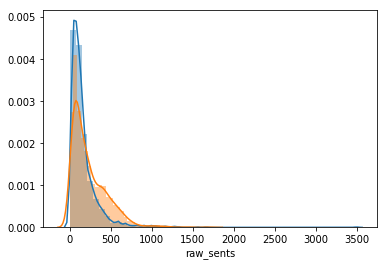

In [46]:
import seaborn as sns
sns.distplot(df_en.raw_sents.str.count(" ").dropna())
sns.distplot(df.raw_sents.str.count(" "))
